In [7]:
from spinbox import *
from spinbox.extras import chistogram
from itertools import count
global_seed = 111

def npr(name, thing):
    print(name,"\n",thing,"\n"+16*"-")

# Tutorial 6: Realistic imaginary-time propagation + 3-body forces

In this tutorial I calculate the amplitude for a propagator according to a realistic force with 2-body and 3-body parts using RBM methods.

Below I define two functions, one doing the whole calculation using the full basis and the other using the tensor product basis.

The dictionary `kwargs` specifies which parts of the Hamiltonian are included. 

In [5]:
kwargs = {"sigma":False, "sigmatau":False, "tau":False, "coulomb":False, "spinorbit":False, "sigma_3b":False}

n_particles = 3
dt = 0.005
n_samples = 10000

s = ProductState(n_particles).random(global_seed + 7)
sp = ProductState(n_particles, ketwise=False).random(global_seed + 11)
s_full = s.copy().to_full_basis()
sp_full = sp.copy().to_full_basis()

pot = NuclearPotential(n_particles)
#pot.random(seed=global_seed + 51) 
pot.sigma_3b[0,0,0,1,0,2] = -5.

def propagator_amplitude_hilbertspace(**kwargs):
    seeder = count(global_seed,1)
    
    prop_exact = ExactPropagator(n_particles, dt)    
    prop_rbm = HilbertPropagatorRBM(n_particles, dt)

    amp_exact = sp_full * prop_exact.propagator_combined(pot, **kwargs) * s_full
    npr("exact amplitude: ", amp_exact)
    
    integ = Integrator(potential=pot, propagator=prop_rbm)
    amp_samples_rbm = np.zeros(2*n_samples, dtype=complex)

    integ.setup(n_samples, seed=next(seeder), **kwargs)
    amp_samples_rbm[:n_samples] = integ.run(sp_full, s_full)

    integ.setup(n_samples, seed=next(seeder), flip_aux=True, **kwargs)
    amp_samples_rbm[n_samples:] = integ.run(sp_full, s_full)
    
    amp_mean_rbm = np.mean(amp_samples_rbm)
    amp_std_rbm = np.std(amp_samples_rbm)
    print(f"full space RBM amplitude, balanced : {amp_mean_rbm} +/- {amp_std_rbm/np.sqrt(2*n_samples)}")
    err = (amp_mean_rbm - amp_exact)/ amp_exact
    err = err.flatten()[0]
    npr("full space relative error : ", err)
    print("abs % error : ", 100*np.abs(err))
    chistogram(amp_samples_rbm, filename=None, title="RBM distribution, balanced")
    
def propagator_amplitude_productspace(**kwargs):
    seeder = count(global_seed,1)
    prop_exact = ExactPropagator(n_particles, dt)
    prop_rbm = ProductPropagatorRBM(n_particles, dt)

    amp_exact = sp_full * prop_exact.propagator_combined(pot, **kwargs) * s_full
    npr("exact amplitude: ", amp_exact)
    
    integ = Integrator(potential=pot, propagator=prop_rbm)
    amp_samples_rbm = np.zeros(2*n_samples, dtype=complex)

    integ.setup(n_samples, seed=next(seeder), **kwargs)
    amp_samples_rbm[:n_samples] = integ.run(sp, s)

    integ.setup(n_samples, seed=next(seeder), flip_aux=True, **kwargs)
    amp_samples_rbm[n_samples:] = integ.run(sp, s)
    
    amp_mean_rbm = np.mean(amp_samples_rbm)
    amp_std_rbm = np.std(amp_samples_rbm)
    print(f"product space RBM amplitude, balanced : {amp_mean_rbm} +/- {amp_std_rbm/np.sqrt(2*n_samples)}")
    err = (amp_mean_rbm - amp_exact)/ amp_exact
    err = err.flatten()[0]
    npr("product space relative error : ", err)
    print("abs % error : ", 100*np.abs(err))
    chistogram(amp_samples_rbm, filename=None, title="RBM distribution, balanced")

exact amplitude:  
 [[-0.06392189-0.01997894j]] 
----------------


100%|██████████| 10000/10000 [00:13<00:00, 764.18it/s]


full space RBM amplitude, balanced : (-0.06492902942494481-0.020316132603490362j) +/- 0.0006499051794731582
full space relative error :  
 (0.01585558613286948+0.000319411148679781j) 
----------------
abs % error :  1.5858803079007693


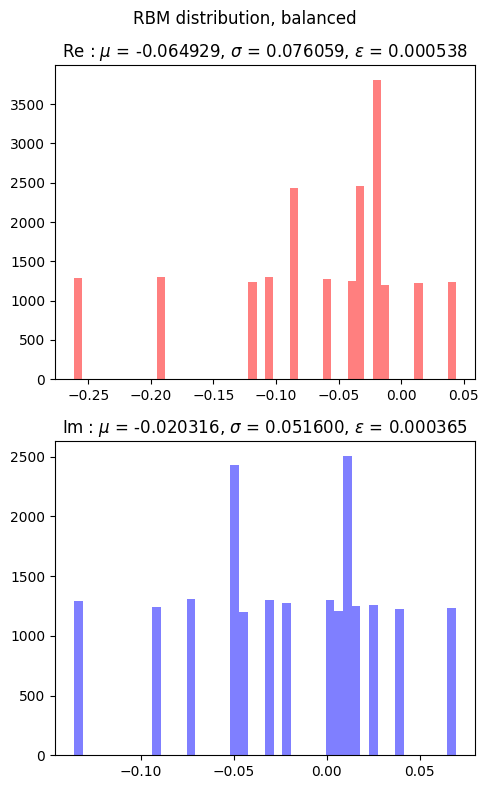

exact amplitude:  
 [[-0.06392189-0.01997894j]] 
----------------


100%|██████████| 10000/10000 [00:01<00:00, 5324.72it/s]


product space RBM amplitude, balanced : (-0.06492902942494481-0.020316132603490356j) +/- 0.0006499051794731582
product space relative error :  
 (0.01585558613286945+0.00031941114867968214j) 
----------------
abs % error :  1.585880307900766


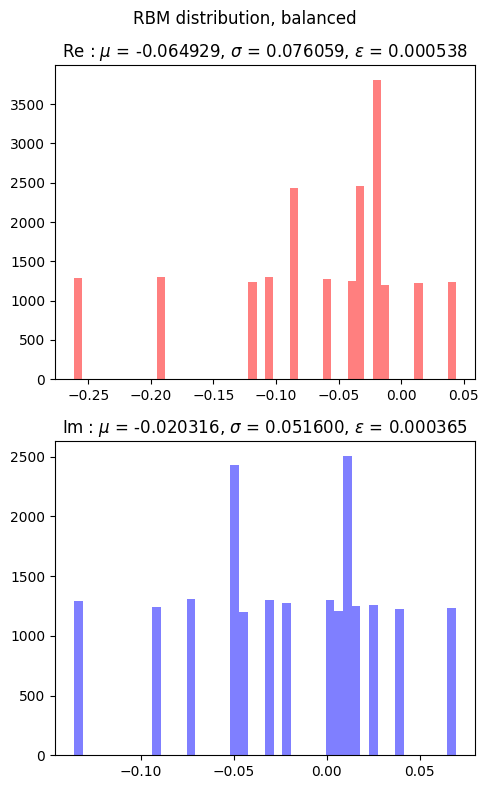

In [6]:
kwargs = {"sigma":False, "sigmatau":False, "tau":False, "coulomb":False, "spinorbit":False, "sigma_3b":True}
propagator_amplitude_hilbertspace(**kwargs)
propagator_amplitude_productspace(**kwargs)

exact amplitude:  
 [[-0.00881567+0.01979385j]] 
----------------


100%|██████████| 10000/10000 [00:34<00:00, 287.42it/s]


RBM amplitude, balanced = (-0.008199053373471522+0.019654069108956323j) +/- 0.0010024471769922408
RBM error =  
 [[-0.01747074-0.02337076j]] 
----------------


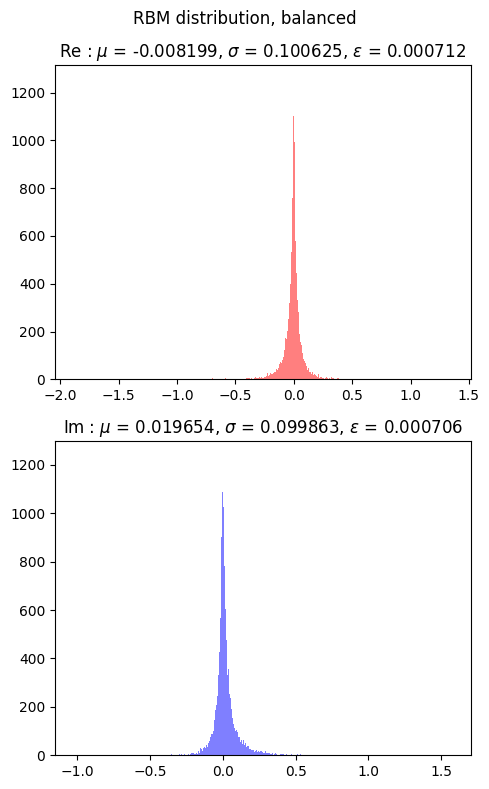

exact amplitude:  
 [[0.0515831+0.07867093j]] 
----------------


100%|██████████| 10000/10000 [00:02<00:00, 3535.40it/s]


RBM amplitude, balanced = (0.04900411176917404+0.07685988803849868j) +/- 0.002314722464326787
RBM error =  
 [[-0.0311311+0.01236984j]] 
----------------


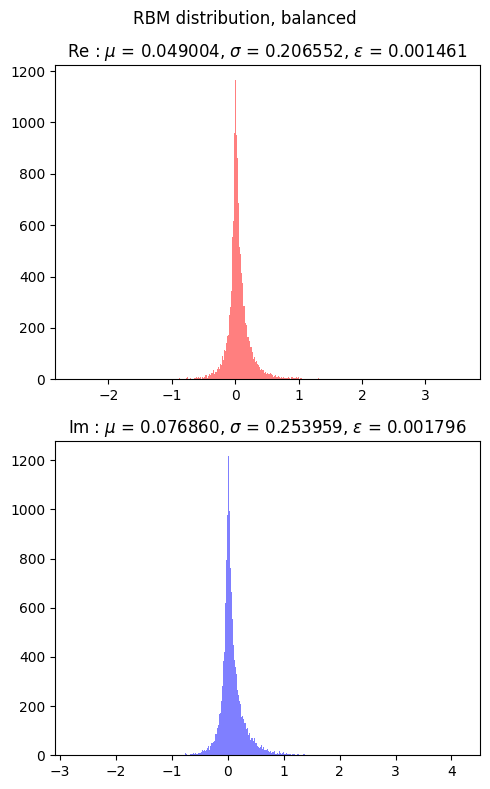

In [8]:
kwargs = {"sigma":True, "sigmatau":False, "tau":False, "coulomb":False, "spinorbit":False, "sigma_3b":False}
propagator_amplitude_hilbertspace(dt, n_samples, **kwargs)
propagator_amplitude_productspace(dt, n_samples, **kwargs)

In [9]:
kwargs = {"sigma":True, "sigmatau":True, "tau":False, "coulomb":False, "spinorbit":False, "sigma_3b":False}
propagator_amplitude_hilbertspace(dt, n_samples, **kwargs)
propagator_amplitude_productspace(dt, n_samples, **kwargs)

exact amplitude:  
 [[-0.03537528+0.03981556j]] 
----------------


 47%|████▋     | 4710/10000 [01:10<00:42, 125.89it/s] 

exact amplitude:  
 [[-0.03260835+0.03994077j]] 
----------------


100%|██████████| 10000/10000 [00:08<00:00, 1249.76it/s]


RBM amplitude, balanced = (-0.031986141804584194+0.037043161558103735j) +/- 0.0027843971251375775
RBM error =  
 [[-0.05116356+0.02619245j]] 
----------------


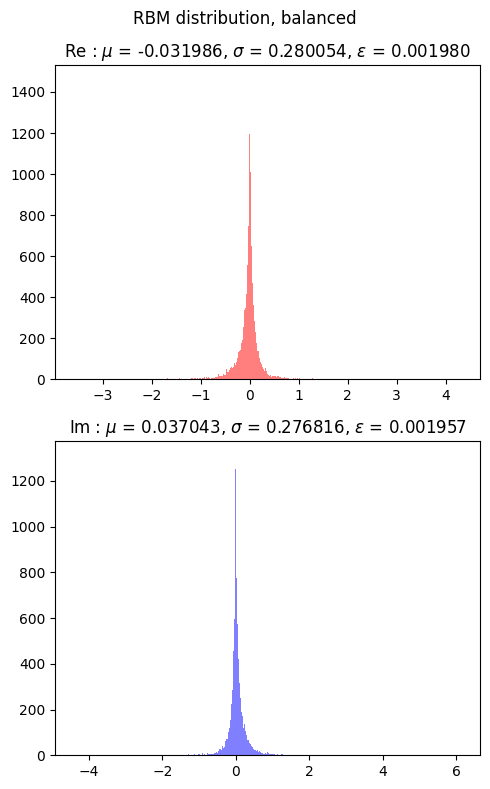

In [6]:
kwargs = {"sigma":True, "sigmatau":True, "tau":True, "coulomb":False, "spinorbit":False, "sigma_3b":False}
propagator_amplitude_hilbertspace(dt, n_samples, **kwargs)
propagator_amplitude_productspace(dt, n_samples, **kwargs)

exact amplitude:  
 [[0.07900133-0.04449582j]] 
----------------


100%|██████████| 10000/10000 [00:08<00:00, 1170.84it/s]


RBM amplitude, balanced = (0.07650639877034904-0.04211661261684431j) +/- 0.005181824324395138
RBM error =  
 [[-0.03685251+0.00935968j]] 
----------------


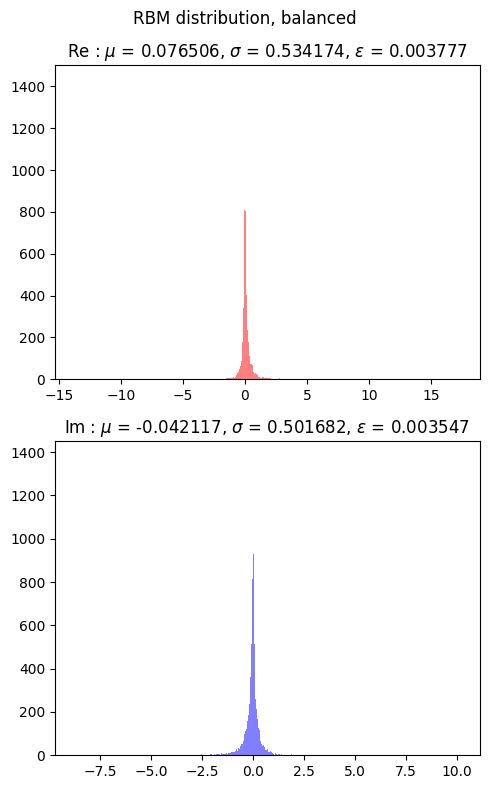

In [7]:
kwargs = {"sigma":True, "sigmatau":True, "tau":True, "coulomb":True, "spinorbit":False, "sigma_3b":False}
propagator_amplitude_hilbertspace(dt, n_samples, **kwargs)
propagator_amplitude_productspace(dt, n_samples, **kwargs)

exact amplitude:  
 [[-0.00563501+0.00395395j]] 
----------------


100%|██████████| 10000/10000 [00:10<00:00, 935.89it/s]


RBM amplitude, balanced = (-0.0031925514098628672+0.0032165542432633395j) +/- 0.005917075310555416
RBM error =  
 [[-0.3519715-0.11610972j]] 
----------------


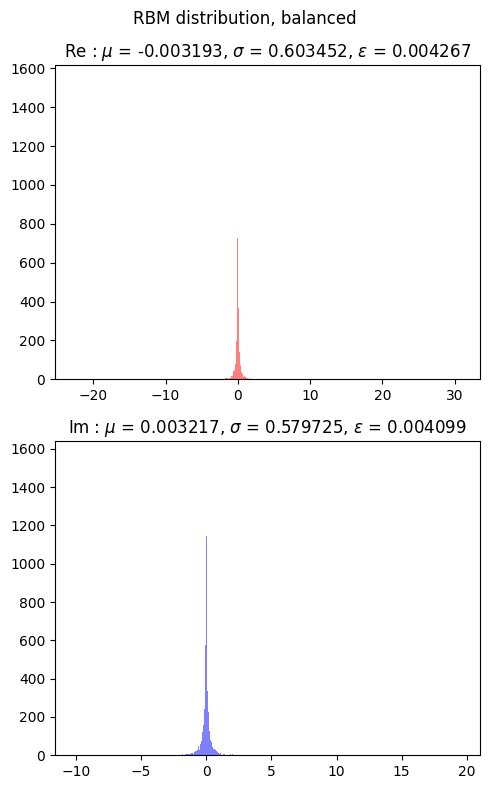

In [8]:
kwargs = {"sigma":True, "sigmatau":True, "tau":True, "coulomb":True, "spinorbit":True, "sigma_3b":False}
propagator_amplitude_hilbertspace(dt, n_samples, **kwargs)
propagator_amplitude_productspace(dt, n_samples, **kwargs)

exact amplitude:  
 [[-0.0013736-0.00303592j]] 
----------------


100%|██████████| 10000/10000 [00:03<00:00, 2533.17it/s]


RBM amplitude, balanced = (0.07745038334962433-0.3136505571739647j) +/- 0.22090465056502093
RBM error =  
 [[75.17648432+59.97725551j]] 
----------------


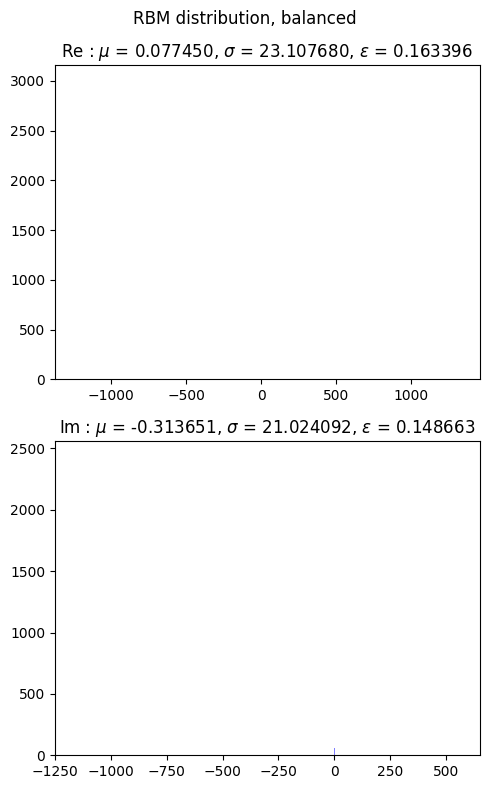

In [10]:
# kwargs = {"sigma":True, "sigmatau":True, "tau":True, "coulomb":True, "spinorbit":True, "sigma_3b":True}
kwargs = {"sigma":False, "sigmatau":False, "tau":False, "coulomb":False, "spinorbit":False, "sigma_3b":True}
propagator_amplitude_hilbertspace(dt, n_samples, **kwargs)
propagator_amplitude_productspace(dt, n_samples, **kwargs)
